# EDA

In [2]:
import subprocess
import sys

# Asegurar la instalación de pandas
try:
    import pandas as pd
except ImportError:
    print("pandas is not installed. Installing...")
    subprocess.check_call([sys.executable, "-m", "pip", "install", "pandas", "--user"])
    import pandas as pd

# Asegurar la instalación de matplotlib
try:
    import matplotlib.pyplot as plt
except ImportError:
    print("matplotlib is not installed. Installing...")
    subprocess.check_call([sys.executable, "-m", "pip", "install", "matplotlib", "--user"])
    import matplotlib.pyplot as plt

# Asegurar la instalación de ydata-profiling
try:
    from ydata_profiling import ProfileReport
except ImportError:
    print("ydata-profiling is not installed. Installing...")
    subprocess.check_call([sys.executable, "-m", "pip", "install", "ydata-profiling", "--user"])
    from ydata_profiling import ProfileReport

In [3]:
import os
dataset_path = os.path.join('data', 'used_cars_data.csv')

df=pd.read_csv(dataset_path)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


In [4]:
df.head(3)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50


In [5]:
df.columns

Index(['S.No.', 'Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price', 'Price'],
      dtype='object')

In [4]:
df['Power'] = df['Power'].apply(lambda x: str(x)[:-3] if isinstance(x, str) and len(x) >= 3 else x)

In [5]:
df['Engine'] = df['Engine'].apply(lambda x: str(x)[:-2] if isinstance(x, str) and len(x) >= 2 else x)
df

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998,58.16,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582,126.2,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199,88.7,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248,88.76,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968,140.8,5.0,NaN,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598,103.6,5.0,NaN,NaN
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197,103.6,5.0,NaN,NaN
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461,63.1,5.0,NaN,NaN
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197,103.6,5.0,NaN,NaN


In [6]:
df['Mileage'] = df['Mileage'].str.replace(r'[^0-9.]', '', regex=True).astype(float)

# Ver los primeros valores de Mileage después de limpiar
print("\nValores de Mileage después de limpiar:")
print(df['Mileage'].head())

# Verificar si hay valores NaN después de la conversión
missing_mileage = df['Mileage'].isna().sum()
print(f"\nNúmero de valores faltantes en Mileage después de la limpieza: {missing_mileage}")


Valores de Mileage después de limpiar:
0    26.60
1    19.67
2    18.20
3    20.77
4    15.20
Name: Mileage, dtype: float64

Número de valores faltantes en Mileage después de la limpieza: 2


In [7]:
missing_values = df.isna().sum()

# Mostrar los valores faltantes por columna
print("Valores faltantes por columna:")
print(missing_values)

# Calcular el número total de valores faltantes en el DataFrame
total_missing = df.isna().sum().sum()
print(f"\nNúmero total de valores faltantes en el DataFrame: {total_missing}")

Valores faltantes por columna:
S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                  46
Seats                  53
New_Price            6247
Price                1234
dtype: int64

Número total de valores faltantes en el DataFrame: 7628


In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Asumiendo que df ya está definido y contiene tus datos

# Manejo de valores faltantes en atributos numéricos
numeric_features = ['Year', 'Kilometers_Driven', 'Seats']
df[numeric_features] = df[numeric_features].fillna(df[numeric_features].mean())

# Convertir el atributo 'Mileage' a string antes de limpiar
df['Mileage'] = df['Mileage'].astype(str)

# Reemplazar cualquier cadena vacía con NaN
df['Mileage'] = df['Mileage'].replace('', np.nan)

# Limpiar el atributo Mileage para que solo tenga números
df['Mileage'] = df['Mileage'].str.replace(r'[^0-9.]', '', regex=True)

# Convertir 'Mileage' a float, forzando los errores a NaN
df['Mileage'] = pd.to_numeric(df['Mileage'], errors='coerce')

# Rellenar valores faltantes en 'Mileage' con la media
df['Mileage'] = df['Mileage'].fillna(df['Mileage'].mean())

# Convertir valores no numéricos de "New_Price" a NaN y eliminar filas donde "New_Price" es NaN
df['New_Price'] = df['New_Price'].astype(str).str.replace(r'[^0-9.]', '', regex=True)
df['New_Price'] = pd.to_numeric(df['New_Price'], errors='coerce')
df = df.dropna(subset=['New_Price'])

# Convertir "New_Price" en categorías (barato, no barato)
median_price = df['New_Price'].median()
df['New_Price_Category'] = np.where(df['New_Price'] <= median_price, 'barato', 'no barato')

# Seleccionar solo las características numéricas para X
X = df[numeric_features + ['Mileage']]
y = df['New_Price_Category']

# Crear el preprocesador (escalado)
preprocessor = StandardScaler()

# Definir el modelo de regresión logística
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo
model.fit(X_train, y_train)

# Predecir las categorías para el conjunto de prueba
y_pred = model.predict(X_test)

# Predecir las probabilidades para el conjunto de prueba
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Solo la probabilidad de la clase positiva

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Comprobar si hay más de una clase en el conjunto de prueba
classes = np.unique(y_test)
if len(classes) > 1:
    # Binarizar las etiquetas para calcular ROC AUC
    y_test_binarized = label_binarize(y_test, classes=['barato', 'no barato'])[:, 1]
    
    # Calcular el ROC AUC
    roc_auc = roc_auc_score(y_test_binarized, y_pred_proba)
    
    # Graficar la curva ROC
    fpr, tpr, _ = roc_curve(y_test_binarized, y_pred_proba)
    
    plt.figure(figsize=(10, 8))
    plt.plot(fpr, tpr, label=f'ROC (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')  # Línea diagonal de referencia
    plt.xlabel('Tasa de Falsos Positivos (FPR)')
    plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
    plt.title('Curva ROC')
    plt.legend(loc='lower right')
    plt.show()

    print(f'ROC AUC: {roc_auc:.2f}')
else:
    print("No hay suficientes clases en el conjunto de prueba para calcular ROC AUC.")

print(f'Precisión del modelo: {accuracy:.2f}')
print('Matriz de confusión:')
print(conf_matrix)


IndexError: index 1 is out of bounds for axis 1 with size 1

Primera fila (Categoría "barato"):

36 instancias clasificadas correctamente como "barato".

14 instancias clasificadas erróneamente como "medio".

24 instancias clasificadas erróneamente como "caro".

Segunda fila (Categoría "medio"):

5 instancias clasificadas erróneamente como "barato".

54 instancias clasificadas correctamente como "medio".

7 instancias clasificadas erróneamente como "caro".

Tercera fila (Categoría "caro"):

19 instancias clasificadas erróneamente como "barato".

24 instancias clasificadas erróneamente como "medio".

19 instancias clasificadas correctamente como "caro".

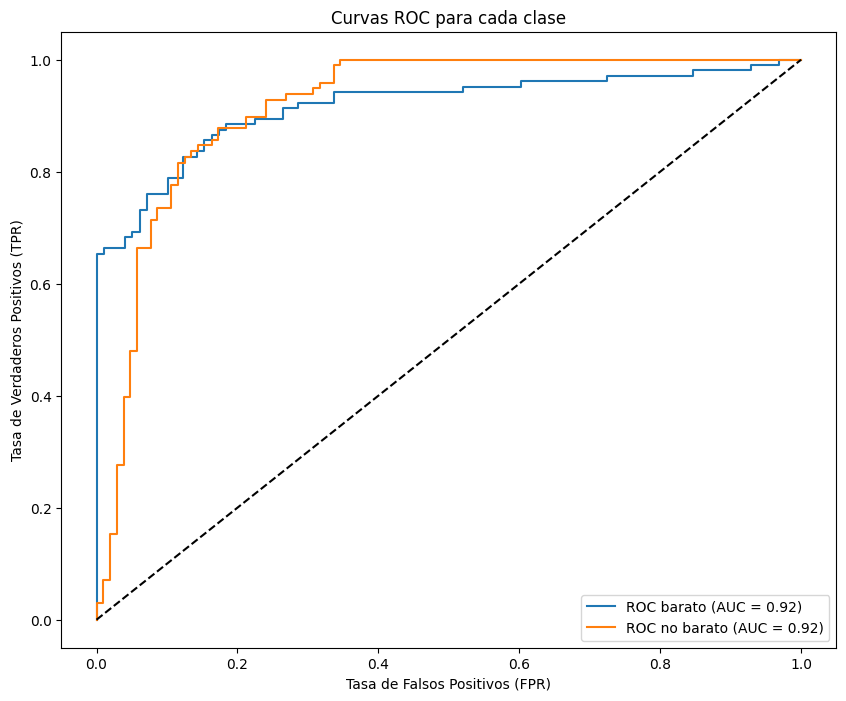

Precisión del modelo: 0.85
Matriz de confusión:
[[91 13]
 [18 80]]
Valores ROC AUC por clase:
ROC AUC para barato: 0.92
ROC AUC para no barato: 0.92
ROC AUC (promedio macro): 0.92


In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Asumiendo que df ya está definido y contiene tus datos

# Manejo de valores faltantes en atributos numéricos
numeric_features = ['Year', 'Kilometers_Driven', 'Seats']
df[numeric_features] = df[numeric_features].fillna(df[numeric_features].mean())

# Manejo de valores faltantes y limpieza en atributos categóricos
categorical_features = ['Fuel_Type', 'Transmission', 'Owner_Type']

# Convertir el atributo 'Mileage' a string antes de limpiar
df['Mileage'] = df['Mileage'].astype(str)

# Reemplazar cualquier cadena vacía con NaN
df['Mileage'] = df['Mileage'].replace('', np.nan)

# Limpiar el atributo Mileage para que solo tenga números
df['Mileage'] = df['Mileage'].str.replace(r'[^0-9.]', '', regex=True)

# Convertir 'Mileage' a float, forzando los errores a NaN
df['Mileage'] = pd.to_numeric(df['Mileage'], errors='coerce')

# Rellenar valores faltantes en 'Mileage' con la media
df['Mileage'] = df['Mileage'].fillna(df['Mileage'].mean())

# Convertir valores no numéricos de "New_Price" a NaN y eliminar filas donde "New_Price" es NaN
df['New_Price'] = df['New_Price'].astype(str).str.replace(r'[^0-9.]', '', regex=True)
df['New_Price'] = pd.to_numeric(df['New_Price'], errors='coerce')
df = df.dropna(subset=['New_Price'])

# Convertir "New_Price" en categorías (barato, no barato)
median_price = df['New_Price'].median()
df['New_Price_Category'] = np.where(df['New_Price'] <= median_price, 'barato', 'no barato')

# Separar características numéricas y categóricas
X_numeric = df[numeric_features + ['Mileage']]
X_categorical = df[categorical_features]
y = df['New_Price_Category']

# Crear el preprocesador para atributos numéricos y categóricos
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features + ['Mileage']),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Definir el modelo de regresión logística
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

# Dividir los datos en conjunto de entrenamiento y prueba
X = df[numeric_features + ['Mileage'] + categorical_features]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo
model.fit(X_train, y_train)

# Predecir las categorías para el conjunto de prueba
y_pred = model.predict(X_test)

# Predecir las probabilidades para el conjunto de prueba
y_pred_proba = model.predict_proba(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Binarizar las etiquetas para calcular ROC AUC
y_test_binarized = pd.get_dummies(y_test)

# Calcular el ROC AUC para cada clase
roc_auc_values = {}
for i, class_name in enumerate(['barato', 'no barato']):
    roc_auc = roc_auc_score(y_test_binarized[class_name], y_pred_proba[:, i])
    roc_auc_values[class_name] = roc_auc

# Calcular el ROC AUC promedio macro
roc_auc_macro = np.mean(list(roc_auc_values.values()))

# Graficar la curva ROC para cada clase
plt.figure(figsize=(10, 8))
for i, class_name in enumerate(['barato', 'no barato']):
    fpr, tpr, _ = roc_curve(y_test_binarized[class_name], y_pred_proba[:, i])
    plt.plot(fpr, tpr, label=f'ROC {class_name} (AUC = {roc_auc_values[class_name]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Línea diagonal de referencia
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curvas ROC para cada clase')
plt.legend(loc='lower right')
plt.show()

print(f'Precisión del modelo: {accuracy:.2f}')
print('Matriz de confusión:')
print(conf_matrix)
print('Valores ROC AUC por clase:')
for class_name, auc_value in roc_auc_values.items():
    print(f'ROC AUC para {class_name}: {auc_value:.2f}')
print(f'ROC AUC (promedio macro): {roc_auc_macro:.2f}')
